In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/My Drive/Machinelearning/Data/

# Here we set the path for our data file

Mounted at /gdrive
/gdrive/My Drive/Machinelearning/Data


Context:
- The client wants to predict the anime ratings of a new anime series based on the attibutes given in the data dictionary below

### Data Dictionary:

- title : Title
- mediaType : Type of Anime
- eps : No. of episodes
- duration : Duration in minutes
- startYr : Start Year
- finishYr : Finish Year
- description : Description
- contentWarn : Content Waring
- watched : How many people have watched
- watching : How many people are watching
- rating : Rating
- votes : Votes
- studio_primary : Primary Studio
- studios_colab : IS there a colaboration with any other studio
- genre : Genre


In [ ]:
# Import the necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



### Reading the input data file

In [ ]:

data=pd.read_csv("anime_ratings_data.csv")

### Create a shallow copy
- It is always better to create a shallow copy, so that the we need not read the file again and again (time consuming)

In [ ]:
df = data.copy()
df.head(5)

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.000,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.000,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.000,2008,2008,NaN,No,10,0,2.120,10.000,Others,No,Other
2,GJ-bu@,TV Special,1,46.000,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.000,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.000,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.000,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.000,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.000,Others,No,Other


### Checking the Shape
- Shape gives us the number of columns and rows

In [ ]:
df.shape

(6523, 15)

### Checking the column names

In [ ]:
df.columns

Index(['title', 'mediaType', 'eps', 'duration', 'startYr', 'finishYr',
       'description', 'contentWarn', 'watched', 'watching', 'rating', 'votes',
       'studio_primary', 'studios_colab', 'genre'],
      dtype='object')

### Using info and Describe on the df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,6523,6523,Dragon Ball Z Movie 15: Resurrection 'F',1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,6496,8,TV,2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,6523.0,NaN,NaN,NaN,8.716235,11.002479,1.0,1.0,1.0,12.0,34.0
duration,6248.0,NaN,NaN,NaN,18.396287,20.94935,1.0,5.0,7.0,25.0,67.0
startYr,6523.0,NaN,NaN,NaN,2005.241147,12.911035,1967.0,2000.0,2010.0,2015.0,2020.0
finishYr,6523.0,NaN,NaN,NaN,2005.575349,12.568169,1970.0,2000.0,2010.0,2015.0,2020.0
description,4114,4081,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,6523,2,No,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watched,6523.0,NaN,NaN,NaN,1347.948643,1737.138112,5.0,56.0,349.0,2252.5,4649.0
watching,6523.0,NaN,NaN,NaN,57.445654,76.527405,0.0,2.0,13.0,98.0,199.0


#### Observations:
- Title and Decription are ID columns (Drop them)


In [ ]:
df1 = df.drop(["title","description"],axis=1)

In [ ]:
df1.columns = [col.replace(' ','_') for col in df1.columns]

In [ ]:
df1.isna().sum()

mediaType          27
eps                 0
duration          275
startYr             0
finishYr            0
contentWarn         0
watched             0
watching            0
rating              0
votes              27
studio_primary      0
studios_colab       0
genre               0
dtype: int64

### Observations:
- We can see that mediaType, duration and votes columns have missing values
- mediaType - We can replace with mode
- duration and votes can be replace by mean

In [ ]:
df1['mediaType']=df1['mediaType'].fillna(value ='TV')
df1['votes'] =df1['votes'].fillna(value = df1['votes'].mean())
df1['duration'] =df1['duration'].fillna(value = df1['duration'].mean())

In [ ]:
df1.isna().sum()

mediaType         0
eps               0
duration          0
startYr           0
finishYr          0
contentWarn       0
watched           0
watching          0
rating            0
votes             0
studio_primary    0
studios_colab     0
genre             0
dtype: int64

In [ ]:
df1.nunique()

mediaType            8
eps                 34
duration            88
startYr             54
finishYr            51
contentWarn          2
watched           1912
watching           198
rating            2781
votes             1555
studio_primary      11
studios_colab        2
genre                9
dtype: int64

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mediaType,6523,8,TV,2172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,6523.000,NaN,NaN,NaN,8.716,11.002,1.000,1.000,1.000,12.000,34.000
duration,6523.000,NaN,NaN,NaN,18.396,20.503,1.000,5.000,8.000,25.000,67.000
startYr,6523.000,NaN,NaN,NaN,2005.241,12.911,1967.000,2000.000,2010.000,2015.000,2020.000
finishYr,6523.000,NaN,NaN,NaN,2005.575,12.568,1970.000,2000.000,2010.000,2015.000,2020.000
contentWarn,6523,2,No,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watched,6523.000,NaN,NaN,NaN,1347.949,1737.138,5.000,56.000,349.000,2252.500,4649.000
watching,6523.000,NaN,NaN,NaN,57.446,76.527,0.000,2.000,13.000,98.000,199.000
rating,6523.000,NaN,NaN,NaN,2.963,0.760,1.111,2.371,2.944,3.568,4.702
votes,6523.000,NaN,NaN,NaN,906.253,1169.250,10.000,35.000,231.000,1544.000,3100.000


## Univariate Analysis

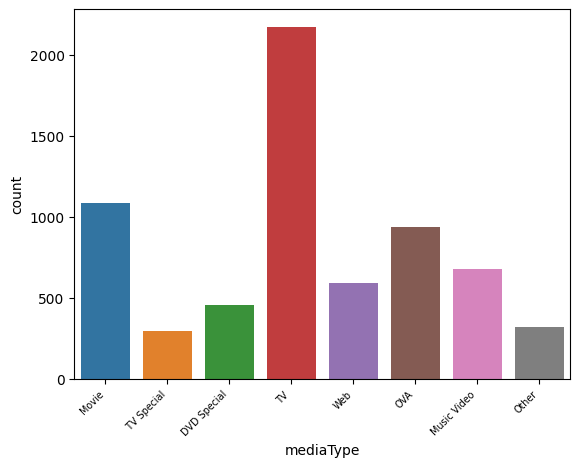

In [ ]:
# MediaType

plot = sns.countplot(df1, x='mediaType')

# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'x-small')



In [ ]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red',orient = 'h') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

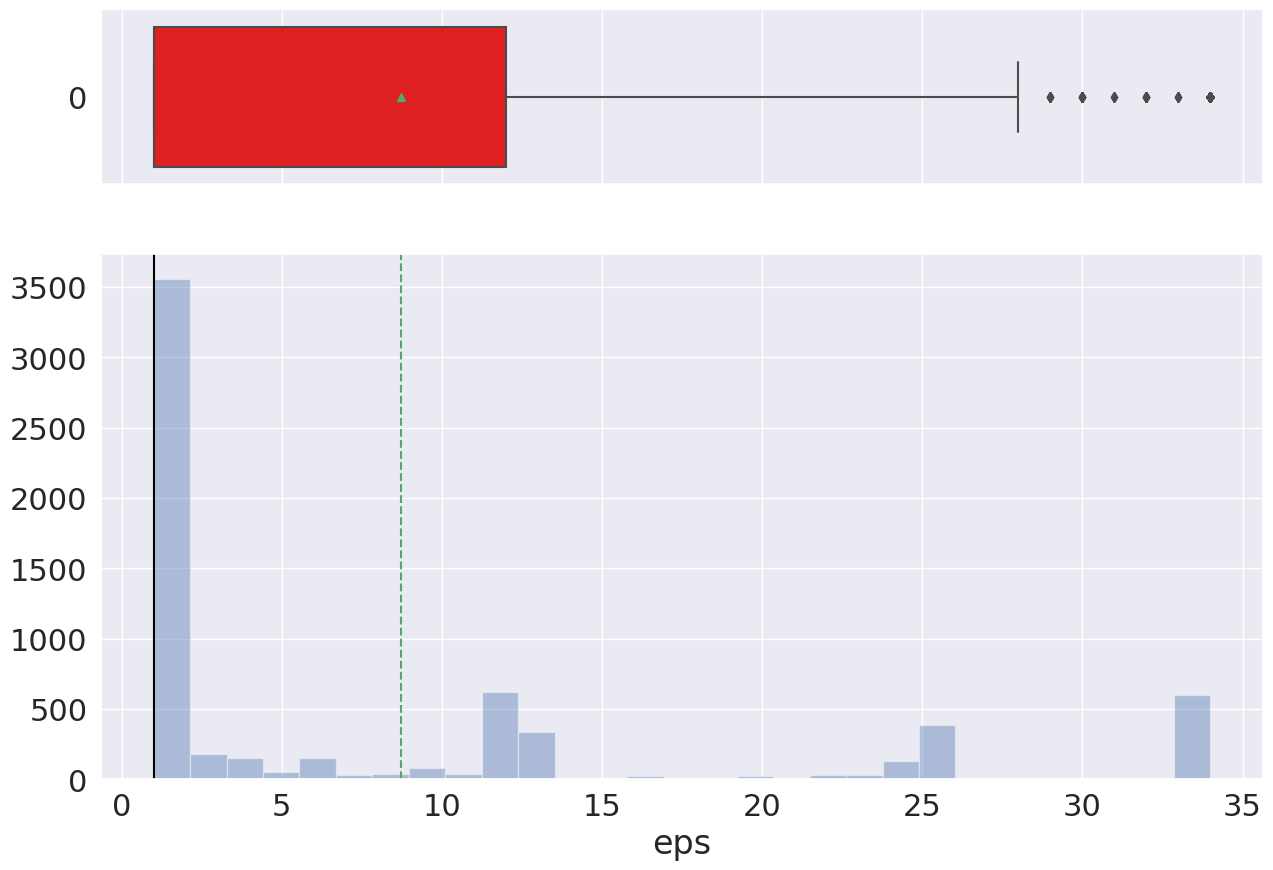

In [ ]:
# eps

histogram_boxplot(df1.eps)


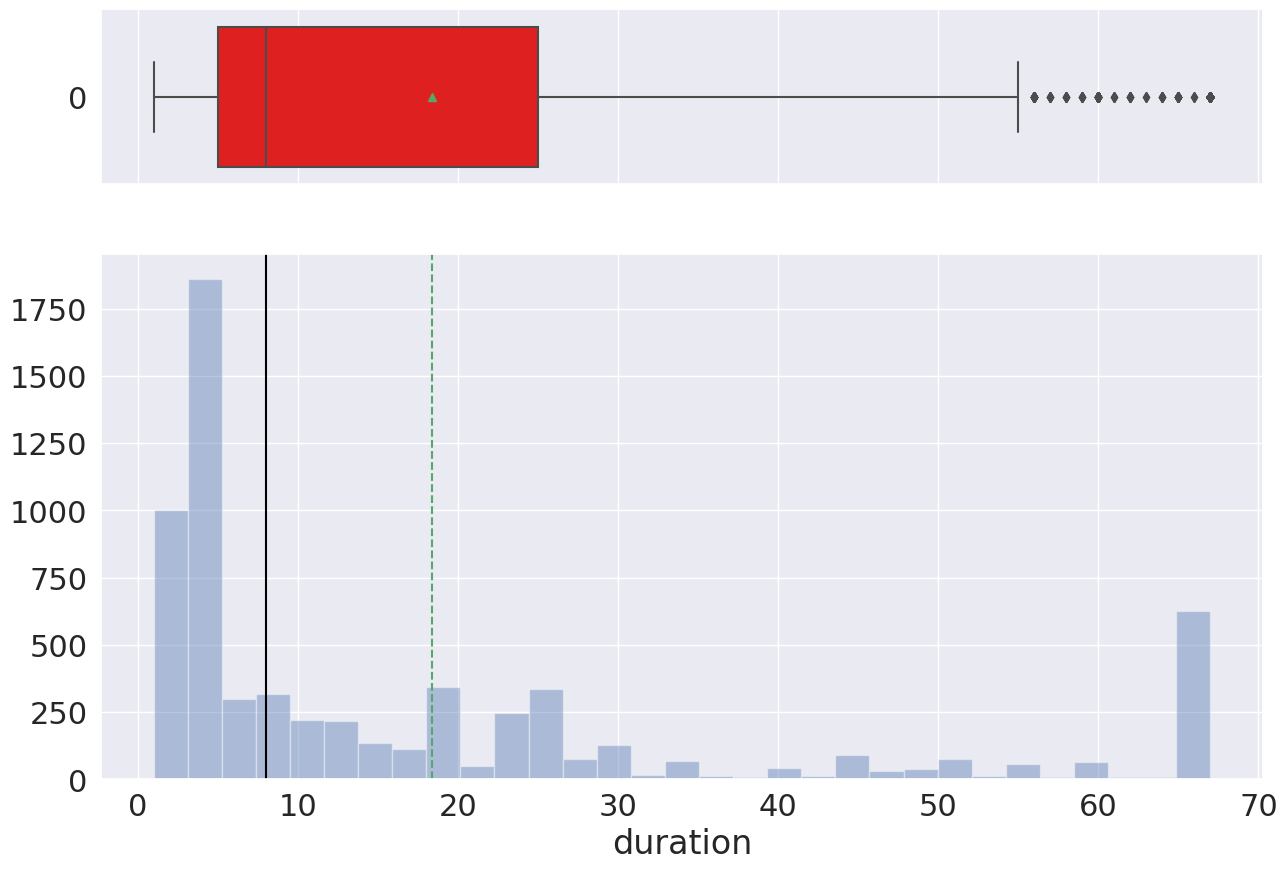

In [ ]:
# duration

histogram_boxplot(df1.duration)

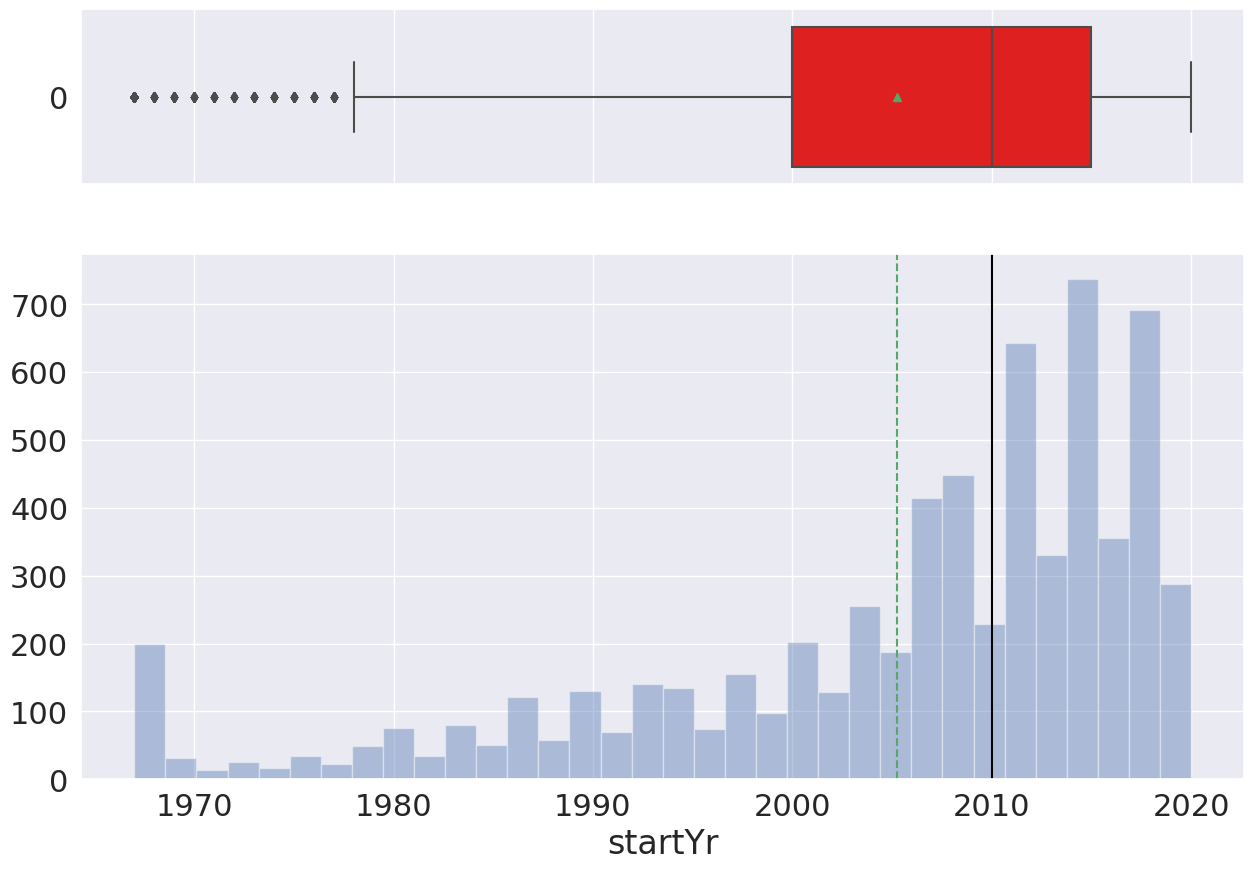

In [ ]:
# startYr

histogram_boxplot(df1.startYr)

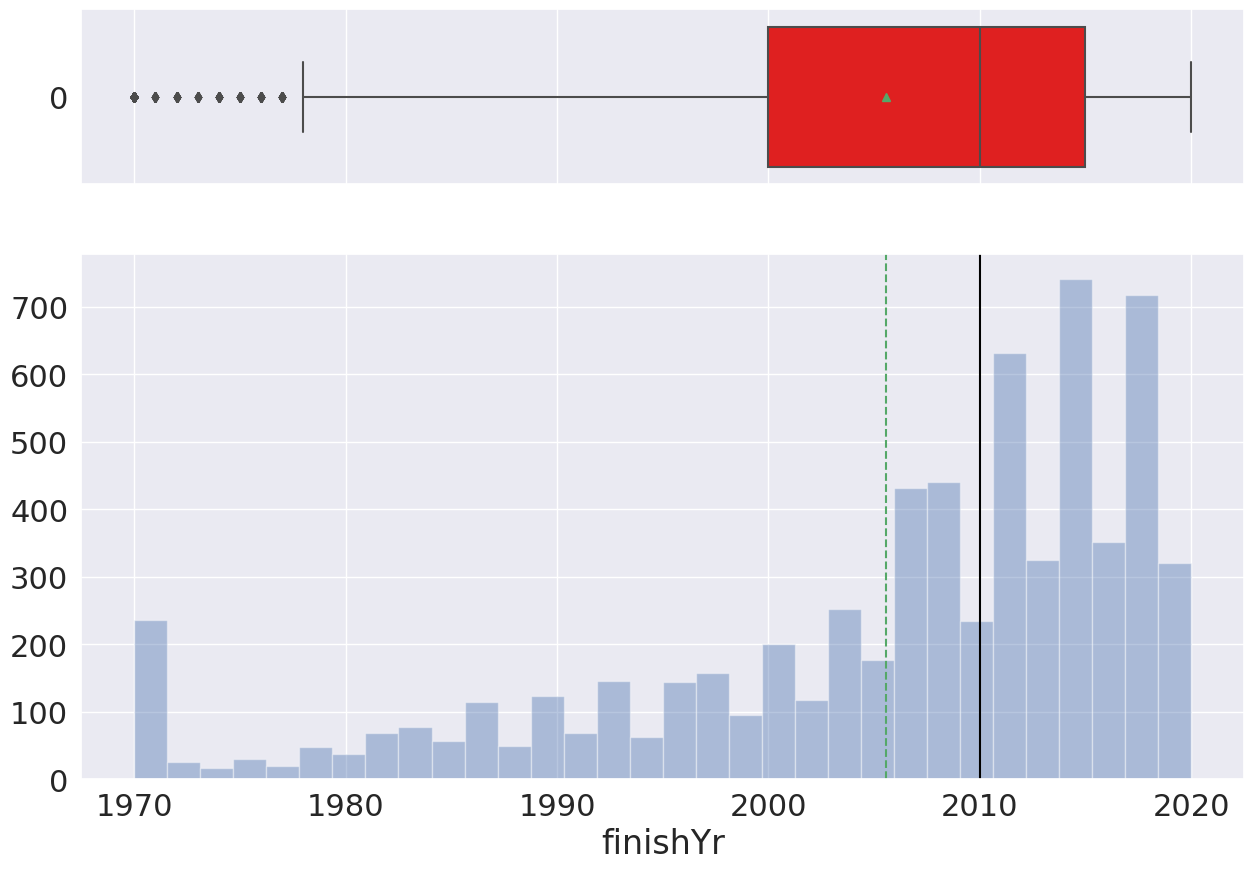

In [ ]:
histogram_boxplot(df1.finishYr)

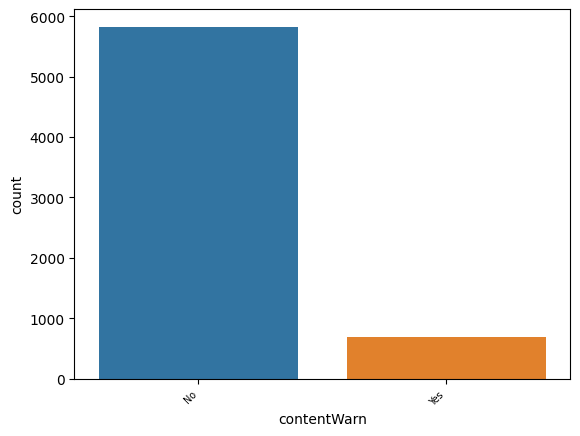

In [ ]:
plot = sns.countplot(df1, x='contentWarn')
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'x-small')



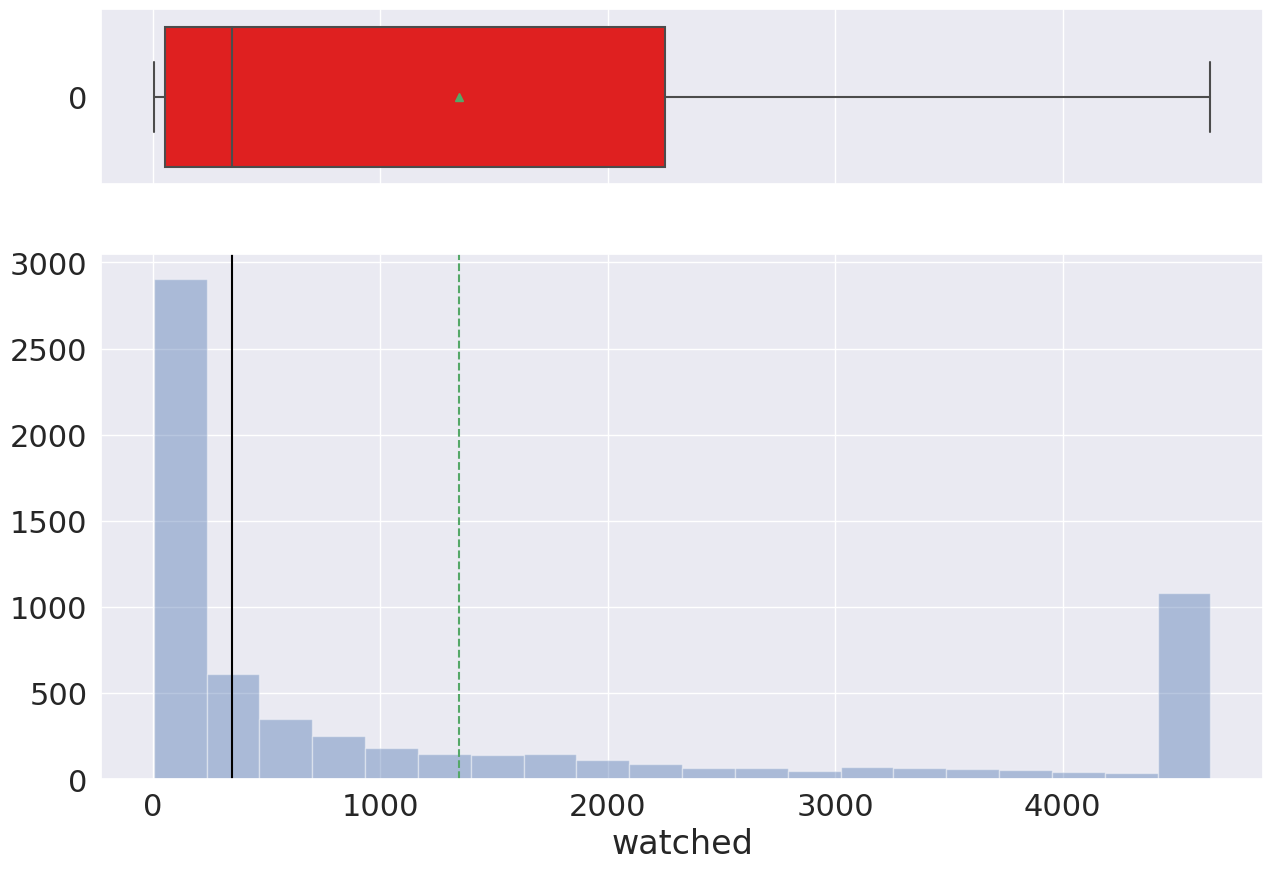

In [ ]:
histogram_boxplot(df1.watched)

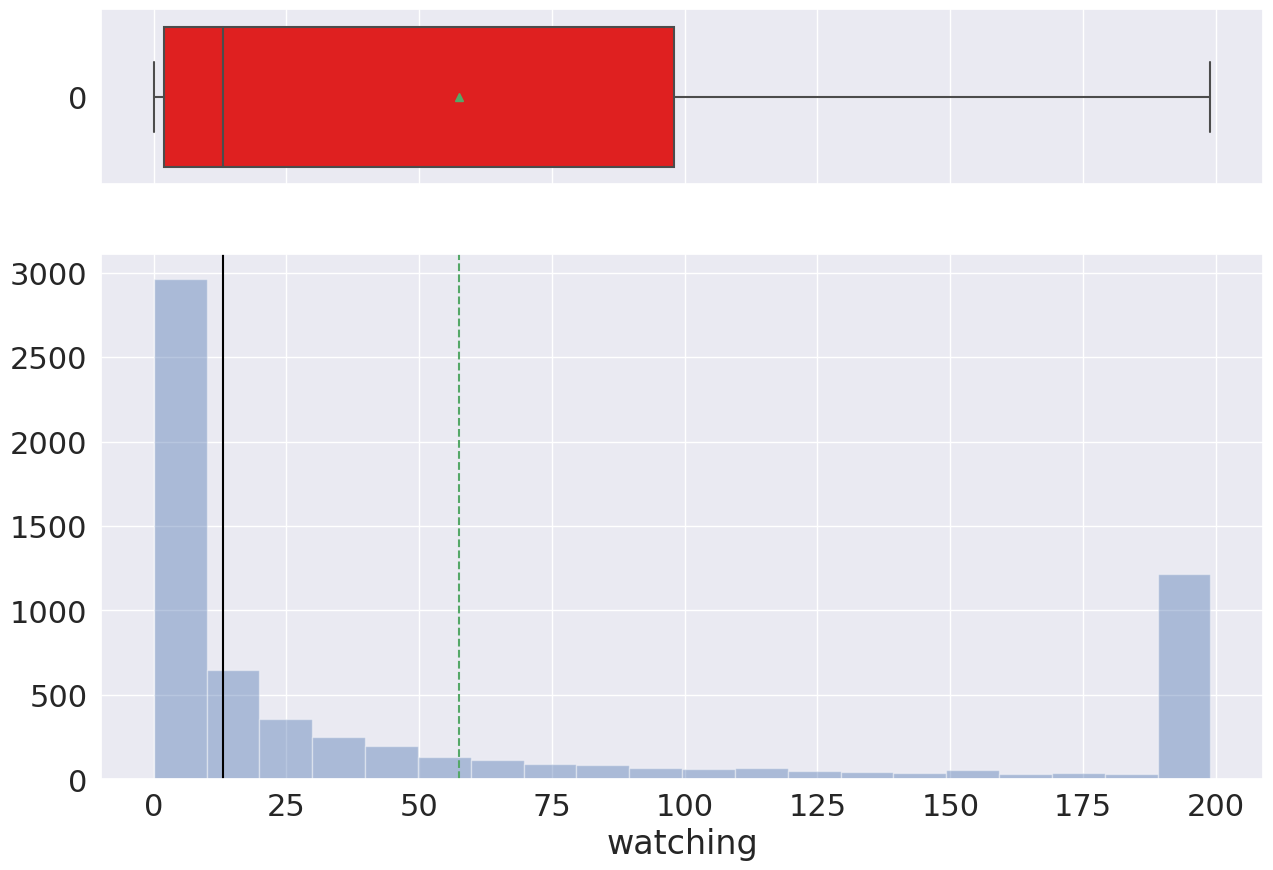

In [ ]:
histogram_boxplot(df1.watching)

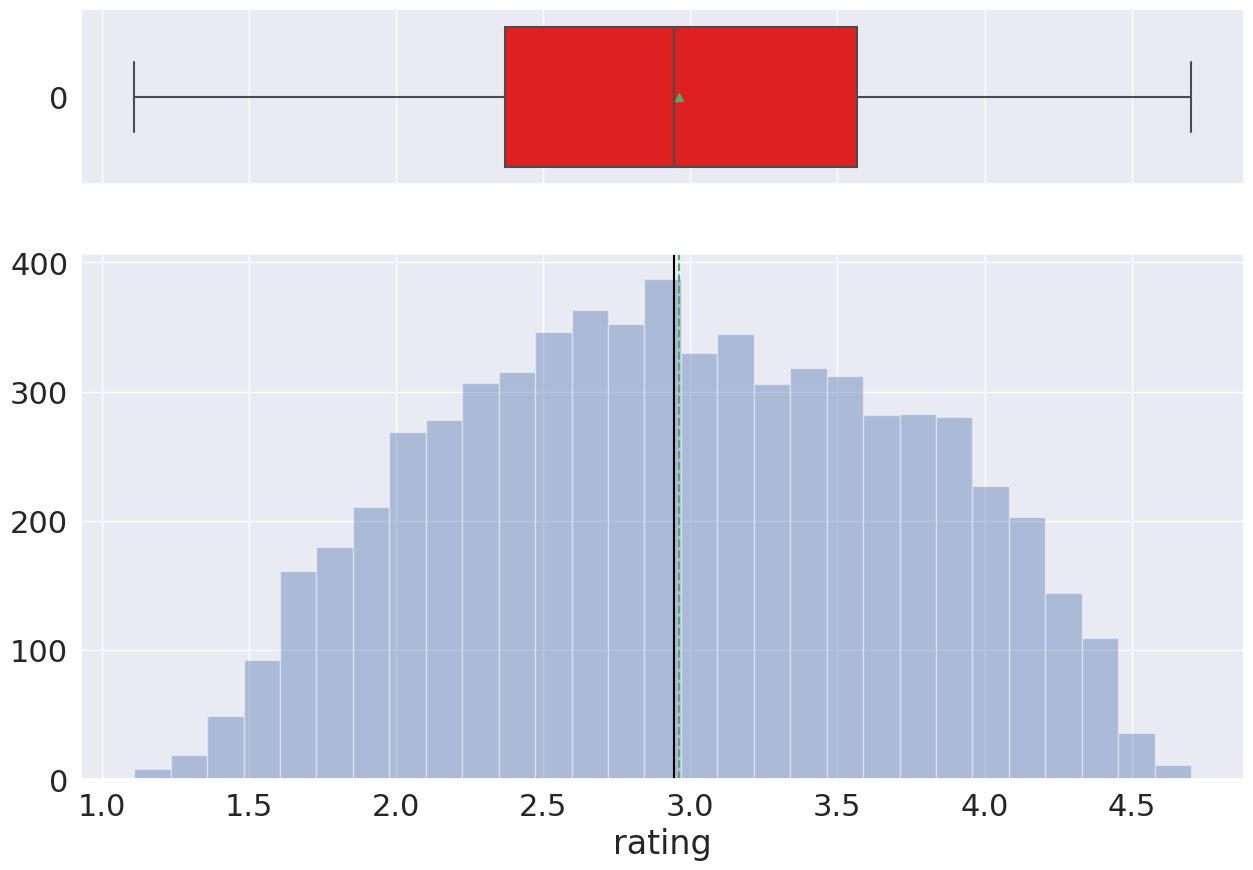

In [ ]:
histogram_boxplot(df1.rating)

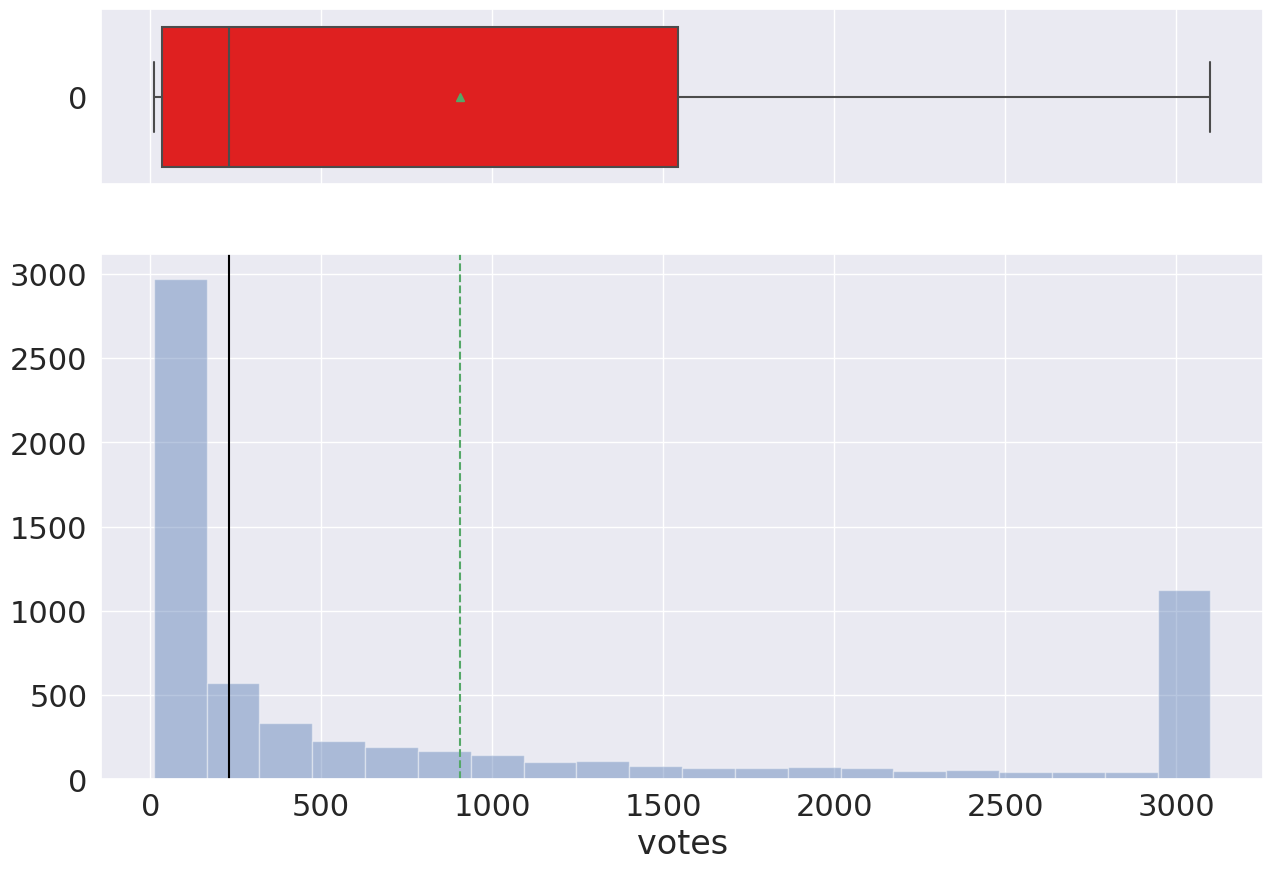

In [ ]:
histogram_boxplot(df1.votes)

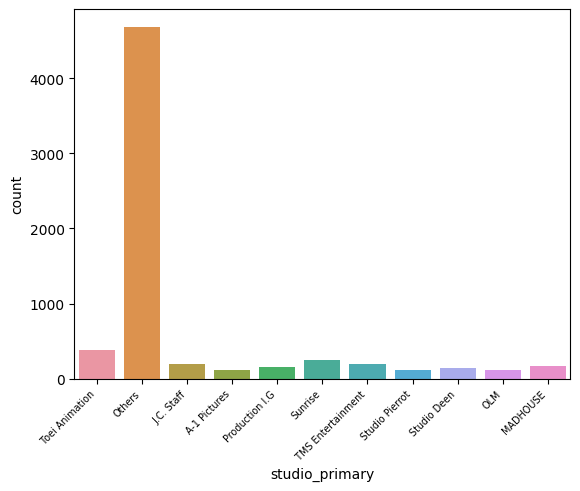

In [ ]:
plot =sns.countplot(df1, x='studio_primary')
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'x-small')



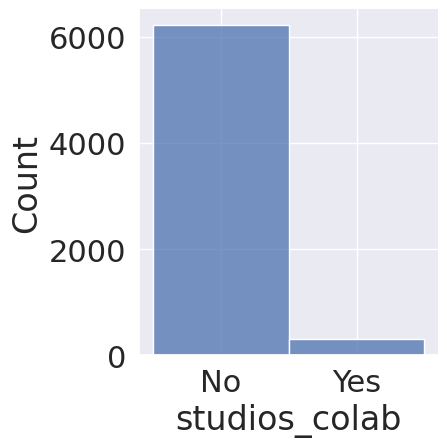

In [ ]:
sns.displot(df1, x='studios_colab')

x-axis tick locations: [0 1 2 3 4 5 6 7 8]
x-axis tick labels: [Text(0, 0, 'Other'), Text(1, 0, 'Drama'), Text(2, 0, 'Adventure'), Text(3, 0, 'Sci Fi'), Text(4, 0, 'Comedy'), Text(5, 0, 'Based on a Manga'), Text(6, 0, 'Action'), Text(7, 0, 'Romance'), Text(8, 0, 'Fantasy')]


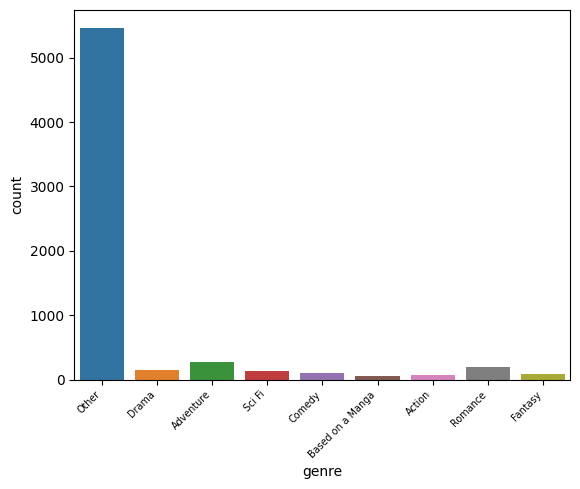

In [ ]:
plot =sns.countplot(df1, x='genre')
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'x-small')

print("x-axis tick locations: " + str(xtick_loc))
print("x-axis tick labels: " + str(plot.get_xticklabels()))

### Multivariate Analysis

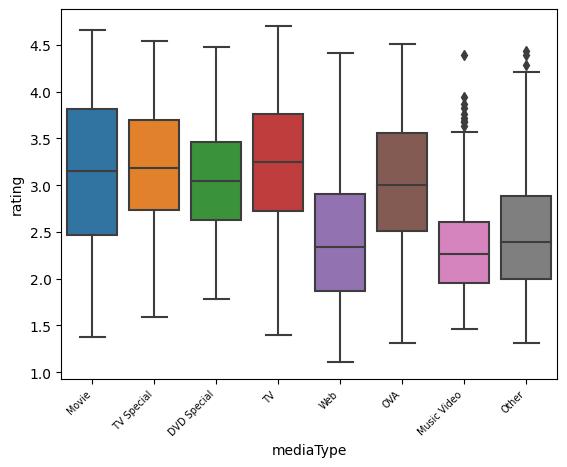

In [ ]:
# MediaType Vs Ratings

#plt.figure(figsize =(15,13))
plot =sns.boxplot(x = 'mediaType', y = 'rating', data = df1)

xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'x-small')

# Observations:
- Other than a few outliers in the Music Video and Other category, we can see that higest ratings are achieved in Movie, TV Special, DVD Specil and TV categories.
-  Web and Music Video categories see lowest of ratings suggesting that Anime viewers are still traditional audience

<Axes: xlabel='eps', ylabel='rating'>

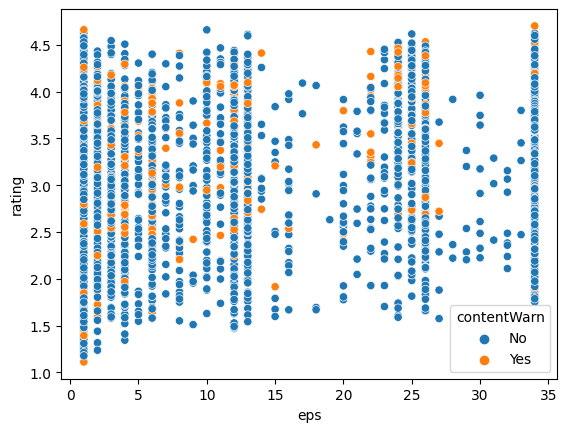

In [ ]:
# Episodes vs Ratings

sns.scatterplot(y='rating',x ='eps',  data = df1, hue = 'contentWarn')

Observations:
- No Significance

<Axes: xlabel='duration', ylabel='rating'>

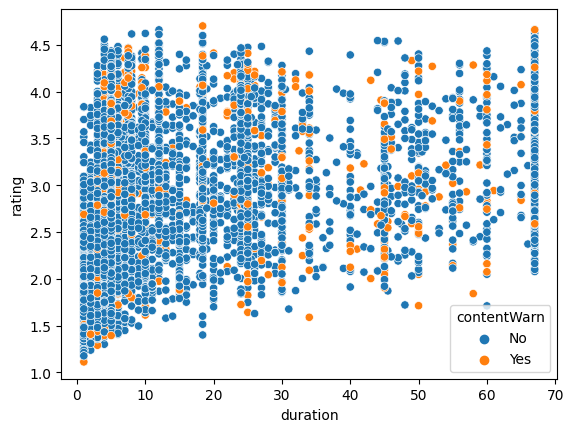

In [ ]:
# Duration vs Ratings

sns.scatterplot(y='rating',x ='duration',  data = df1, hue = 'contentWarn')

### Observations:
- It is clearly observed that the worst ratings (below 1.5)  are observed in the anime where the duration is less than 20 minutes



<Axes: xlabel='watched', ylabel='rating'>

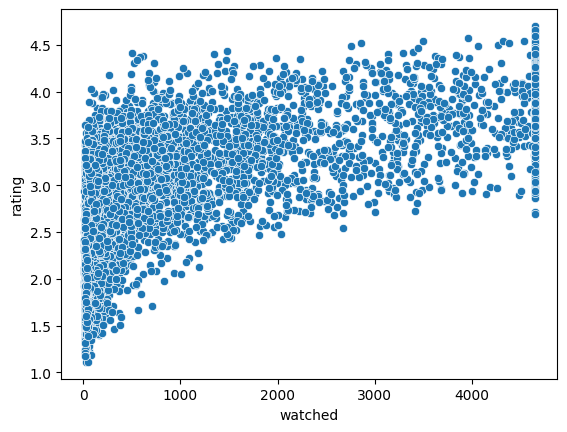

In [ ]:
# watched vs Ratings

sns.scatterplot(y='rating',x ='watched',  data = df1)

### Observations :
- As the number of watched increases, the rating increases (intuitve)

<Axes: xlabel='watching', ylabel='rating'>

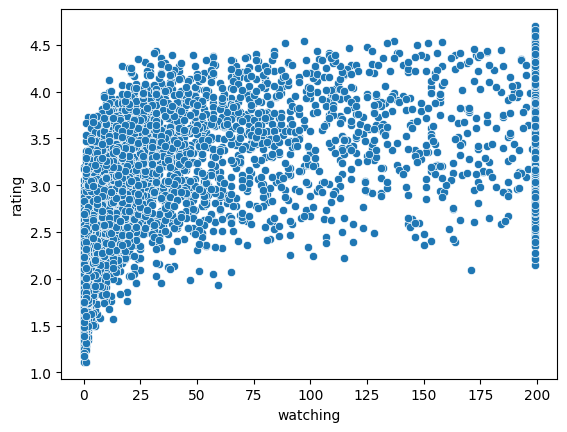

In [ ]:
# watching vs ratings
sns.scatterplot(y='rating',x ='watching',  data = df1)

### Observations :
- As the number of watching increases, the rating increases (intuitve)

<Axes: xlabel='votes', ylabel='rating'>

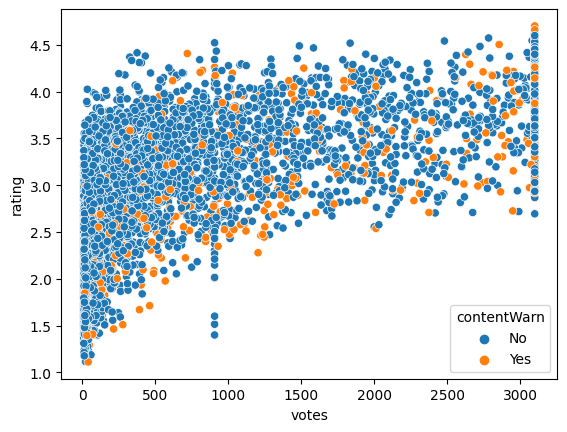

In [ ]:
# Votes vs Ratings
sns.scatterplot(y='rating',x ='votes',  data = df1,hue = 'contentWarn')

### Observations:
- As the number of votes increases, the ratings increase (intuitive)

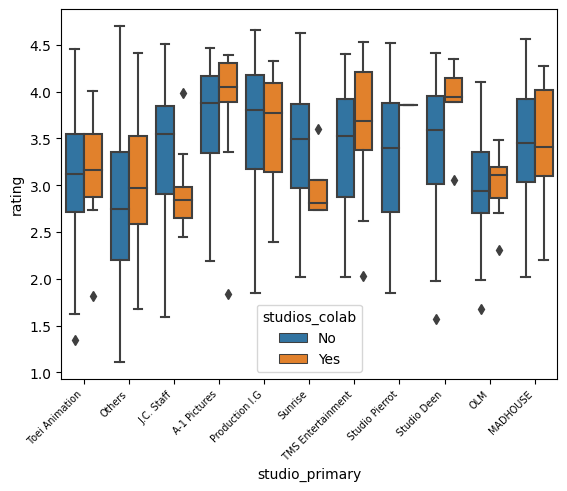

In [ ]:
plot =sns.boxplot(x = 'studio_primary', y = 'rating', data = df1,hue='studios_colab' )

xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'x-small')

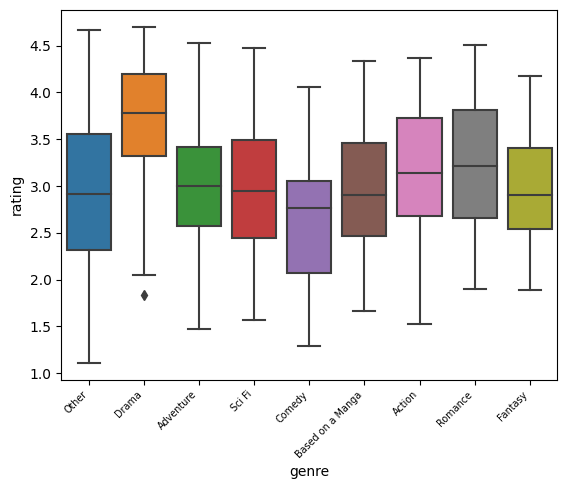

In [ ]:
plot =sns.boxplot(x = 'genre', y = 'rating', data = df1)

xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'x-small')

In [ ]:
corelation = df1.corr()
corelation

,eps,duration,startYr,finishYr,watched,watching,rating,votes
eps,1.000,-0.323,-0.139,-0.121,0.142,0.364,0.196,0.167
duration,-0.323,1.000,-0.183,-0.195,0.113,-0.097,0.343,0.088
startYr,-0.139,-0.183,1.000,0.998,0.159,0.253,0.152,0.174
finishYr,-0.121,-0.195,0.998,1.000,0.159,0.259,0.151,0.175
watched,0.142,0.113,0.159,0.159,1.000,0.790,0.736,0.991
watching,0.364,-0.097,0.253,0.259,0.790,1.000,0.643,0.826
rating,0.196,0.343,0.152,0.151,0.736,0.643,1.000,0.727
votes,0.167,0.088,0.174,0.175,0.991,0.826,0.727,1.000


<Axes: >

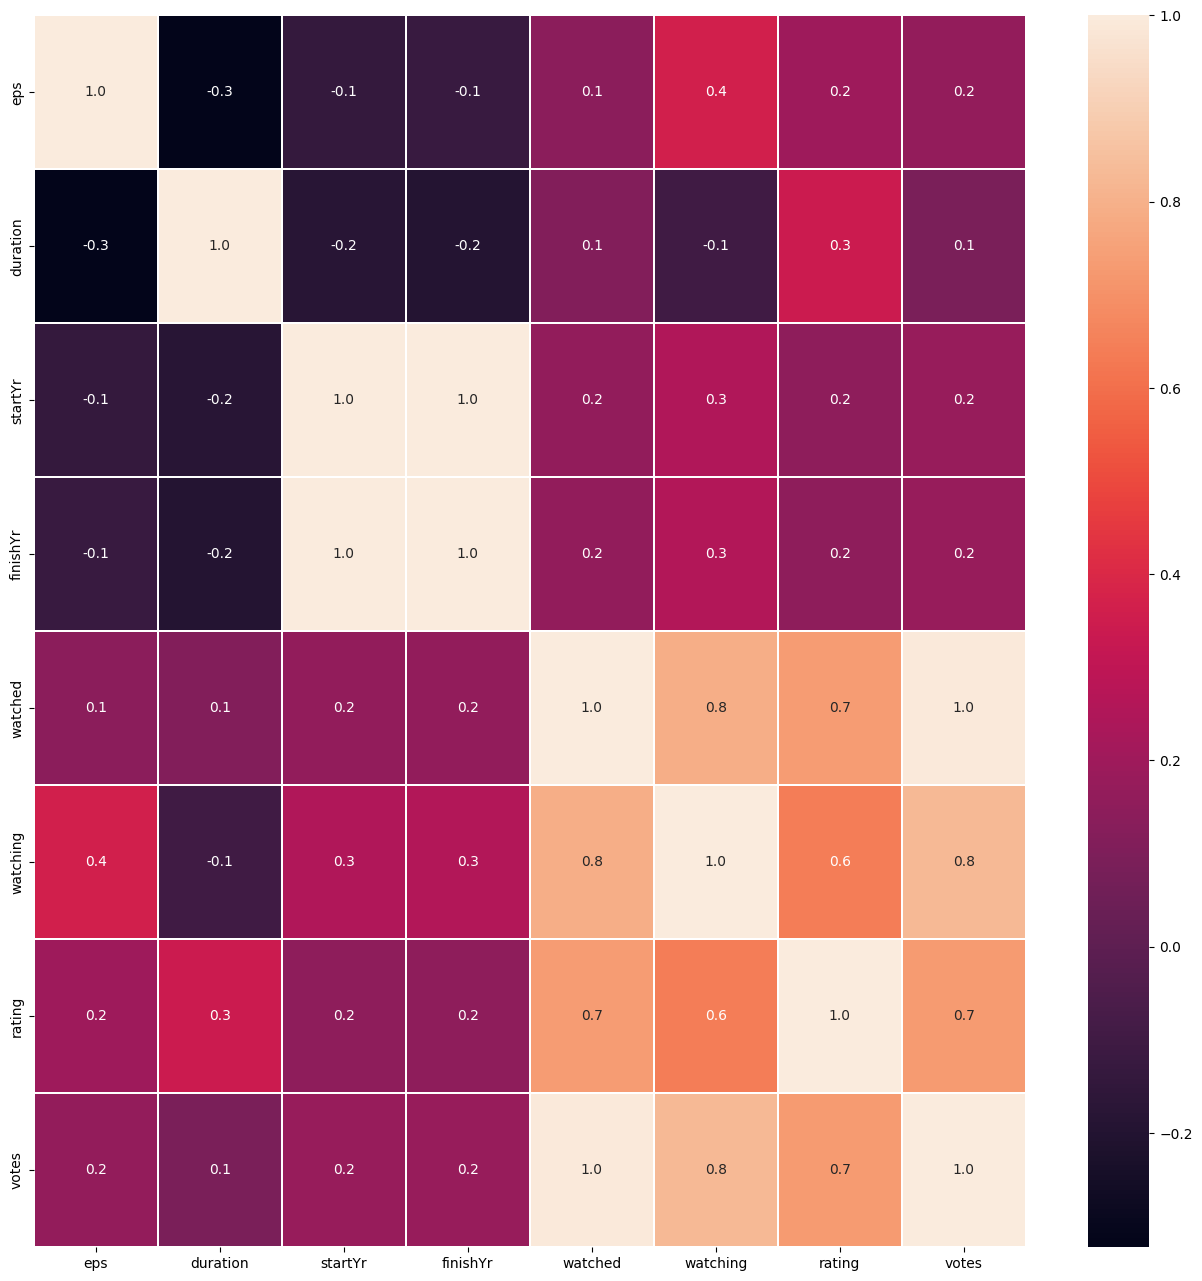

In [ ]:
f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(df1.corr(),annot = True, linewidths=.3,fmt='1.0001f',ax =ax)

In [ ]:
x= df1.drop('rating', axis=1)
y = df1.rating

print(x.head())
print(y.head())

print(x.shape)
print(y.shape)

     mediaType  eps  duration  startYr  finishYr contentWarn  watched  \
0        Movie    1    67.000     2015      2015          No     4649   
1        Movie    1     5.000     2008      2008          No       10   
2   TV Special    1    46.000     2014      2014          No     1630   
3        Movie    1    67.000     1984      1984          No     4649   
4  DVD Special    1     4.000     2019      2019          No      346   

   watching    votes  studio_primary studios_colab  genre  
0        86 3100.000  Toei Animation            No  Other  
1         0   10.000          Others            No  Other  
2        16 1103.000          Others            No  Other  
3       184 3100.000          Others            No  Drama  
4         8  234.000          Others            No  Other  
0   3.979
1   2.120
2   3.758
3   4.444
4   2.494
Name: rating, dtype: float64
(6523, 12)
(6523,)


In [ ]:
x= pd.get_dummies(x,columns = ['mediaType','contentWarn','studio_primary','studios_colab','genre'],drop_first=True)
print(x.head())
print(x.shape)


   eps  duration  startYr  finishYr  watched  watching    votes  \
0    1    67.000     2015      2015     4649        86 3100.000   
1    1     5.000     2008      2008       10         0   10.000   
2    1    46.000     2014      2014     1630        16 1103.000   
3    1    67.000     1984      1984     4649       184 3100.000   
4    1     4.000     2019      2019      346         8  234.000   

   mediaType_Movie  mediaType_Music Video  mediaType_OVA  ...  \
0                1                      0              0  ...   
1                1                      0              0  ...   
2                0                      0              0  ...   
3                1                      0              0  ...   
4                0                      0              0  ...   

   studio_primary_Toei Animation  studios_colab_Yes  genre_Adventure  \
0                              1                  0                0   
1                              0                  0           

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.3,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Intercept of the linear equation:", linearregression.intercept_)
print("\nCoefficients of linear equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

pred = linearregression.predict(x_train)

# Here we get the Beta coefficents: β0(intercept) and β1....βn

Intercept of the linear equation: -10.791120995309297

Coefficients of linear equation are: [ 2.12640609e-02  1.26716143e-02  4.76657969e-02 -4.09469435e-02
  3.68425945e-04  3.01260140e-03 -2.79943656e-04 -2.16248147e-01
 -2.73443039e-01 -2.38210685e-01 -2.46525993e-01 -4.90394481e-01
 -1.32861855e-01 -4.41775675e-01 -1.56622514e-01 -1.22709469e-01
 -9.65110428e-02 -3.95116682e-01 -2.02797773e-01  9.43093081e-02
 -8.96083154e-02 -1.28878324e-01 -2.83256686e-03  1.05429825e-01
 -1.21297231e-01 -3.70892108e-02 -9.09194300e-02  1.24236926e-01
 -1.74451629e-01  2.43074947e-01  4.06705046e-02 -3.24406641e-02
  3.74560892e-02 -4.73439101e-02]


In [ ]:
# function to compute adjusted R- Squared
def adj_r2_score(predictors,targets,predictions):
  r2 = r2_score(targets,predictions)
  n= predictors.shape[0]
  k = predictors.shape[1]
  return 1-((1-r2)*(n-1)/(n-k-1))

# function to compute MAPE
def mape_score(targets,predictions):
  return np.mean(np.abs(targets-predictions)/targets)*100

#function to compute different metrics to check performance of regression model
def model_performance_regression(model,predictors,target):
  # predicting using independent variables
  pred = model.predict(predictors)

  r2 = r2_score(target,pred) # to compute R squared
  adjr2 = adj_r2_score(predictors,target,pred) # to compute adjusted R squared
  rmse = np.sqrt(mean_squared_error(target,pred)) # to compute RMSE
  mae = mean_absolute_error(target,pred) # to compute MAE
  mape = mape_score(target,pred) # to compute MAPE (Mean Absolute Percentage Error)

  # Creating dataframe metrics
  df_perf = pd.DataFrame(
      {
          "RMSE": rmse,
          "MAE" : mae,
          "R-Squared" : r2,
          "Adj. R Squared": adjr2,
          "MAPE": mape,
      },
      index =[0],
  )
  return df_perf


In [ ]:
# Checking model performance on train set
print ("Training Performance\n")
sklmodel_train_perf = model_performance_regression(linearregression,x_train,y_train)
sklmodel_train_perf

Training Performance



,RMSE,MAE,R-Squared,Adj. R Squared,MAPE
0,0.397,0.327,0.723,0.721,12.268


In [ ]:
# Checking model performance on train set
print ("Test Performance\n")
sklmodel_test_perf = model_performance_regression(linearregression,x_test,y_test)
sklmodel_test_perf

Test Performance



,RMSE,MAE,R-Squared,Adj. R Squared,MAPE
0,0.408,0.333,0.722,0.717,12.748
